Marketing & Retail Analytics

Problem Statement - MRA Main Project

Part - A


**Business Context:**

An automobile parts manufacturing company has been actively selling products to a diverse range of customers for the past three years. Despite its growth, the company lacks the in-house expertise to derive actionable insights from its transaction data. As a result, they wish to uncover hidden patterns and trends in their customer transactions. By analyzing this data, the company aims to better understand customer behavior, improve customer segmentation, and implement targeted marketing strategies. These insights will help the company not only enhance customer satisfaction but also drive revenue growth by offering more personalized and efficient services.





**Objective:**

The primary objective of this analysis is to leverage data science techniques to:

Identify underlying patterns in customer purchasing behavior.
Segment customers based on their transactional data.
Provide actionable insights to optimize the company's marketing efforts.
Recommend personalized marketing strategies for each customer segment to maximize sales and customer retention.
Your role as a Business Analyst is to use the provided dataset to achieve these goals and present findings in a manner that can guide the company's decision-making.




**Data Description:**

The dataset provided contains three years of transactional data from the company, with each row representing a unique order. Below is an explanation of the key attributes:


**ORDERNUMBER:**

 Unique identifier for each order.
QUANTITYORDERED: Number of items ordered in a specific transaction.
PRICEEACH: Price per unit of the product in the order.

ORDERLINENUMBER: Sequence number of the product in the order.

SALES: Total sales value for the order.

ORDERDATE: Date when the order was placed.

DAYS_SINCE_LASTORDER: Number of days since the customer's previous order.

STATUS: Current status of the order (e.g., Shipped, Disputed).

PRODUCTLINE: Product category to which the item belongs (e.g., Motorcycles, Classic Cars).

MSRP: Manufacturer’s Suggested Retail Price for the product.

PRODUCTCODE: Unique identifier for the product.

CUSTOMERNAME: Name of the customer placing the order.

PHONE: Customer's contact phone number.

ADDRESSLINE1: Customer's primary address.

CITY: City of the customer's address.

POSTALCODE: Postal code of the customer's address.

COUNTRY: Country of the customer's address.

CONTACTLASTNAME: Last name of the customer’s contact person.

CONTACTFIRSTNAME: First name of the customer’s contact person.

DEALSIZE: Size category of the transaction (e.g., Small, Medium, Large).

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Sales_Data.xlsx to Sales_Data.xlsx


In [ ]:
import pandas as pd

# Load Excel after uploading
df = pd.read_excel("Sales_Data.xlsx")

# Preview first few rows
print("First 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

   ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0 2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1 2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2 2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3 2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4 2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     La

In [ ]:
# Summary statistics for key numeric columns
summary = df[['SALES', 'PRICEEACH', 'QUANTITYORDERED', 'MSRP', 'DAYS_SINCE_LASTORDER']].describe().T

# Rename for clarity
summary.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Q1 (25%)', 'Median', 'Q3 (75%)', 'Max']
summary


,Count,Mean,Std Dev,Min,Q1 (25%),Median,Q3 (75%),Max
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00


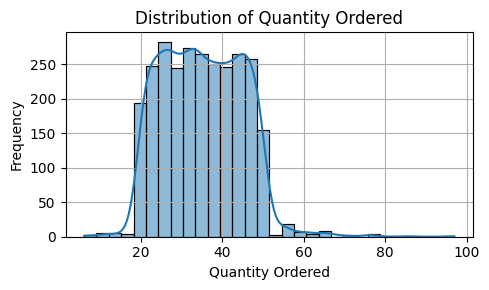

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.histplot(df['QUANTITYORDERED'], bins=30, kde=True)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


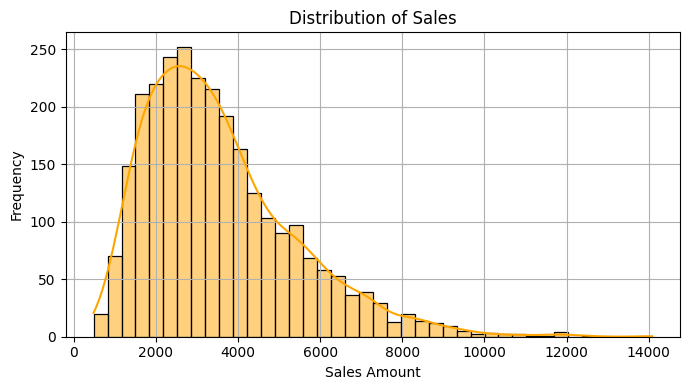

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(df['SALES'], bins=40, kde=True, color='orange')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


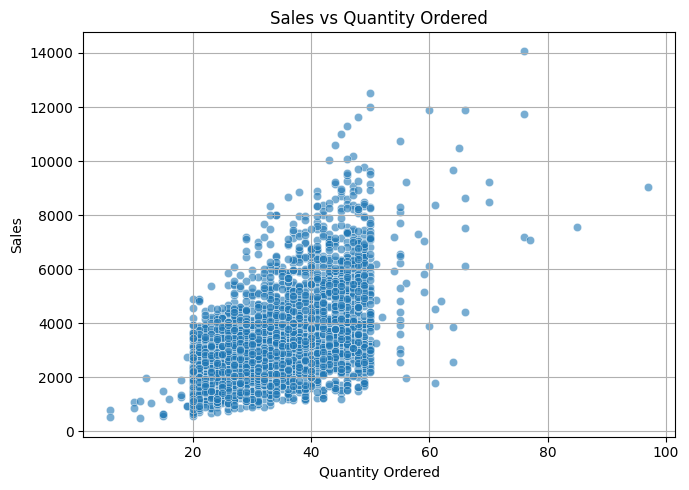

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df, alpha=0.6)
plt.title('Sales vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


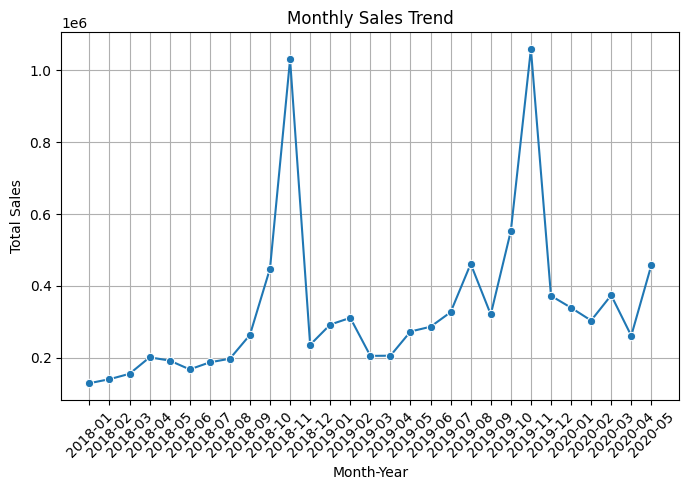

In [ ]:
# Convert ORDERDATE to datetime if not already
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Create a Month-Year column
df['Month_Year'] = df['ORDERDATE'].dt.to_period('M')

# Group and summarize sales
monthly_sales = df.groupby('Month_Year')['SALES'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype(str)

# Plot
plt.figure(figsize=(7, 5))
sns.lineplot(x='Month_Year', y='SALES', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-16-565e9b5afede>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('PRODUCTLINE')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False),


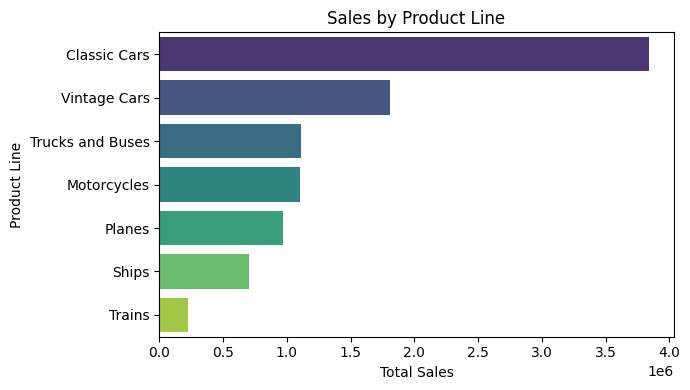

In [ ]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df.groupby('PRODUCTLINE')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False),
            x='SALES', y='PRODUCTLINE', palette='viridis')
plt.title('Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()


<ipython-input-17-1c2727a58982>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('DEALSIZE')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False),


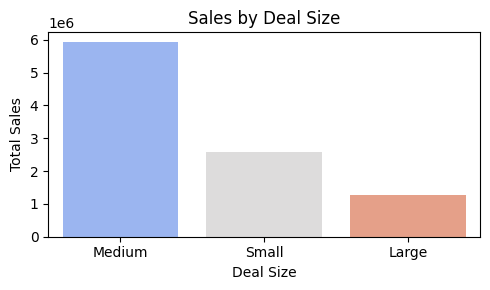

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df.groupby('DEALSIZE')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False),
            x='DEALSIZE', y='SALES', palette='coolwarm')
plt.title('Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


<ipython-input-20-5bf1083b1a71>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


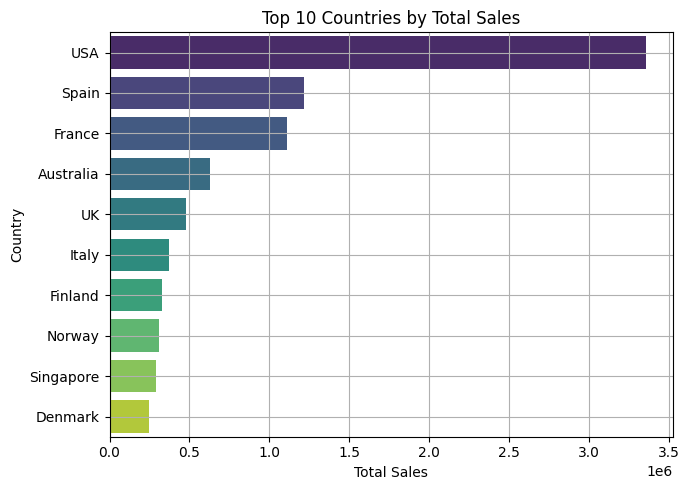

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by COUNTRY and sum the SALES
top_countries = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-19-22276281ec2a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')


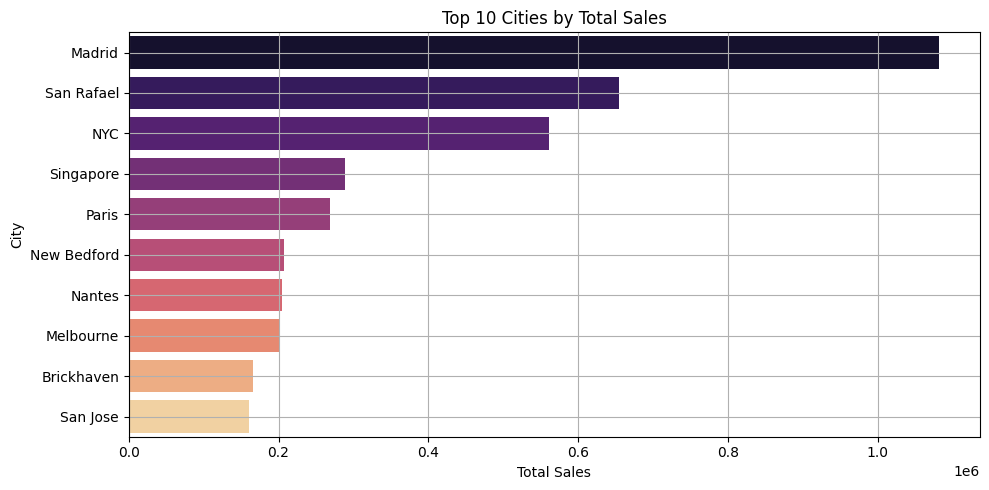

In [ ]:
# Group by CITY and sum SALES
top_cities = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.grid(True)
plt.tight_layout()
plt.show()


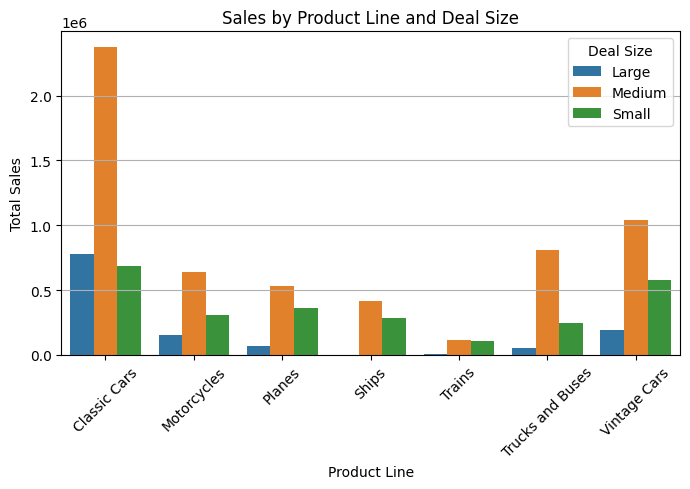

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("Sales_Data.xlsx")

# Group by ProductLine and DealSize, then calculate total sales
grouped_sales = df.groupby(['PRODUCTLINE', 'DEALSIZE'])['SALES'].sum().reset_index()

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=grouped_sales, x='PRODUCTLINE', y='SALES', hue='DEALSIZE')

plt.title('Sales by Product Line and Deal Size')
plt.ylabel('Total Sales')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.legend(title='Deal Size')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


**Observations & Insights**





(1) Sales show a wide range (₹482.13 to ₹14,082.80), with a fairly high mean
     (₹3,553.05), indicating presence of high-value transactions.


(2) PRICEEACH and MSRP have similar distributions, confirming consistency in
    pricing and listed price (MSRP).


(3) QUANTITYORDERED has a median of 35 units, with some large orders up to 97
    units.


(4) DAYS_SINCE_LASTORDER has a high variance, suggesting irregular order
    patterns across customers.
    
  These statistics serve as the foundation for deeper segmentation (RFM Analysis) and market pattern identification.

    



